In [1]:
import sys
sys.path.append('/Users/isabellechen/git-repos/tutorial/makemore/')

In [3]:
import torch

In [11]:
import matplotlib.pyplot as plt

In [4]:
words=open('names.txt','r').read().split()

b={}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram]=b.get(bigram, 0) + 1
        #print(ch1,ch2)

chars = sorted(set(''.join(words)))
char_to_int = {c: i+1 for i, c in enumerate(chars)}
int_to_char = {i+1: c for i, c in enumerate(chars)}
char_to_int['.']=0
int_to_char[0]='.'
N = torch.zeros((27,27), dtype=torch.int32)

In [7]:
xs, ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char_to_int[ch1]
        ix2 = char_to_int[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [8]:
xs

tensor([ 0,  5, 13, 13,  1])

In [9]:
ys

# For instance, When 5 (i.e. xs[1]) is the input, we want the probability of 13 (i.e. ys[1]) to be high!

tensor([ 5, 13, 13,  1,  0])

# One-hot encodings
- We want integers, but we cannot put it directly into NN.
- NN is made up of neurons, and neurons are made up of weights and biases.
- We shouldn't multiply weights (and biases) by integers.

In [10]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

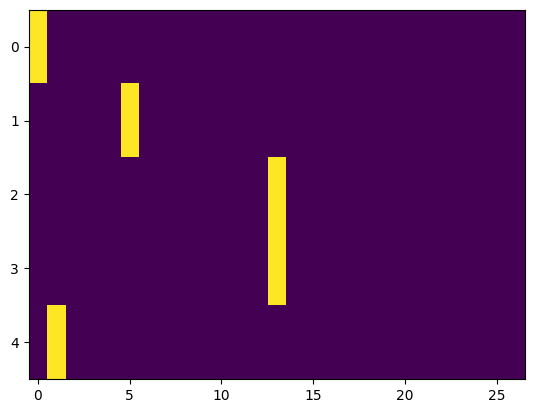

In [12]:
plt.imshow(xenc, aspect='auto')

In [14]:
# Cast the list of ints to list of floats
xenc = xenc.float()
xenc.dtype

torch.float32

In [27]:
# RECALL: W dot x + b

# Initialize W
W = torch.randn((27, 1))
xenc @ W # Matrix multiplication function, which produces the log counts

# Think about this (5, 27) x (27, 1) = (5, 1): 5 activations for 5 inputs

tensor([[ 0.5475],
        [-0.1884],
        [-0.3580],
        [-0.3580],
        [ 0.4697]])

In [25]:
# Taking this one step further, we can have multiple neurons in the hidden layer

W = torch.randn((27, 27)) 
# the first 27 is the number of input neurons
# the second 27 is the number of neuron in the hidden layer
logits = xenc @ W

logits

tensor([[-1.9134, -0.1550,  0.3498, -0.6385, -1.5682,  1.0636,  1.4040, -1.1097,
         -0.3234, -1.1824,  1.4630,  0.6175,  1.1940, -1.7842, -1.7243, -1.0274,
         -0.1001,  1.0985, -0.4474, -1.1233, -0.5143, -0.9258, -0.1222, -1.9806,
         -0.9147,  1.3818,  0.1169],
        [-0.4917, -0.5197,  0.6692, -0.0246,  1.0056,  0.0755,  1.1588, -3.1326,
         -0.6301,  0.8637, -1.5456,  1.9804,  1.0016, -0.5666,  0.8197,  0.2507,
          0.7124,  0.3802,  0.9057,  1.9518, -1.4652,  0.6457,  0.0866, -0.7712,
         -0.4761, -2.0561,  0.4146],
        [ 0.8517, -1.3331,  0.5173,  0.9534,  0.6218, -0.6049,  0.4501,  0.2164,
          0.4663,  0.5125, -0.6241, -0.6393,  0.6493, -1.2030, -1.7165,  1.1670,
          0.3596,  0.4164, -1.5382, -1.7832, -1.7356,  0.1162, -0.8528, -0.4332,
          0.3341,  0.3309,  1.1526],
        [ 0.8517, -1.3331,  0.5173,  0.9534,  0.6218, -0.6049,  0.4501,  0.2164,
          0.4663,  0.5125, -0.6241, -0.6393,  0.6493, -1.2030, -1.7165,  1.1670

In [28]:
counts = logits.exp() # Exponentiate the log counts to get the counts
probs = counts / counts.sum(1, keepdim=True) # Normalize the counts to get the probabilities
probs # The probability of the next character given the current character. The calculation is known as the softmax function

tensor([[0.0043, 0.0251, 0.0417, 0.0155, 0.0061, 0.0851, 0.1195, 0.0097, 0.0212,
         0.0090, 0.1268, 0.0544, 0.0969, 0.0049, 0.0052, 0.0105, 0.0266, 0.0881,
         0.0188, 0.0095, 0.0176, 0.0116, 0.0260, 0.0041, 0.0118, 0.1169, 0.0330],
        [0.0129, 0.0126, 0.0412, 0.0206, 0.0577, 0.0228, 0.0673, 0.0009, 0.0112,
         0.0501, 0.0045, 0.1530, 0.0575, 0.0120, 0.0479, 0.0271, 0.0431, 0.0309,
         0.0522, 0.1487, 0.0049, 0.0403, 0.0230, 0.0098, 0.0131, 0.0027, 0.0320],
        [0.0696, 0.0078, 0.0498, 0.0770, 0.0553, 0.0162, 0.0466, 0.0369, 0.0473,
         0.0496, 0.0159, 0.0157, 0.0568, 0.0089, 0.0053, 0.0953, 0.0425, 0.0450,
         0.0064, 0.0050, 0.0052, 0.0333, 0.0127, 0.0192, 0.0415, 0.0413, 0.0940],
        [0.0696, 0.0078, 0.0498, 0.0770, 0.0553, 0.0162, 0.0466, 0.0369, 0.0473,
         0.0496, 0.0159, 0.0157, 0.0568, 0.0089, 0.0053, 0.0953, 0.0425, 0.0450,
         0.0064, 0.0050, 0.0052, 0.0333, 0.0127, 0.0192, 0.0415, 0.0413, 0.0940],
        [0.0503, 0.1704,

In [29]:
probs[0].sum()

tensor(1.0000)

4

In [33]:
# How the model is doing with random W

l = len(words[0])+1
nlls = torch.zeros(l)

for i in range(l):
    # i-th bigram
    x=xs[i].item()
    y=ys[i].item()

    # The probability of the next character given the current character
    print(f"Bigram:{int_to_char[x]}{int_to_char[y]}")
    print(f"Predicted:{probs[i]}")
    print(f"Acutal:{int_to_char[y]}")
    p = probs[i, y]
    print(f"Probability assigned by the net to the correct charater:{p.item()}")
    nll = -torch.log(p).item()
    print(f"Negative log likelihood:{nll}")
    nlls[i] = nll
    print("----\n")

Bigram:.e
Predicted:tensor([0.0043, 0.0251, 0.0417, 0.0155, 0.0061, 0.0851, 0.1195, 0.0097, 0.0212,
        0.0090, 0.1268, 0.0544, 0.0969, 0.0049, 0.0052, 0.0105, 0.0266, 0.0881,
        0.0188, 0.0095, 0.0176, 0.0116, 0.0260, 0.0041, 0.0118, 0.1169, 0.0330])
Acutal:e
Probability assigned by the net to the correct charater:0.08505567163228989
Negative log likelihood:2.464449167251587
----

Bigram:em
Predicted:tensor([0.0129, 0.0126, 0.0412, 0.0206, 0.0577, 0.0228, 0.0673, 0.0009, 0.0112,
        0.0501, 0.0045, 0.1530, 0.0575, 0.0120, 0.0479, 0.0271, 0.0431, 0.0309,
        0.0522, 0.1487, 0.0049, 0.0403, 0.0230, 0.0098, 0.0131, 0.0027, 0.0320])
Acutal:m
Probability assigned by the net to the correct charater:0.011982955038547516
Negative log likelihood:4.424270153045654
----

Bigram:mm
Predicted:tensor([0.0696, 0.0078, 0.0498, 0.0770, 0.0553, 0.0162, 0.0466, 0.0369, 0.0473,
        0.0496, 0.0159, 0.0157, 0.0568, 0.0089, 0.0053, 0.0953, 0.0425, 0.0450,
        0.0064, 0.0050, 0.0052,